# Cleaning the Car Dataset

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### Importing the data

In [2]:
df = pd.read_csv("C:/Users/Nicolas/Documents/Scraping/thecarconnection/full_specs.csv", index_col=0, 
                 low_memory=False).transpose()
df.index = df.index.str.replace(' Specs: ', ' ')

In [3]:
symbols = '!@#$%^&*()_+[]-–'
letters = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
numbers = '0123456789'

### Editing Columns

#### Detecting hybrid cars

In [4]:
df['Hybrid'] = df['Hybrid/Electric Components Years'].apply(lambda x: 1 if len(str(x))!=3 else 0)
df['Hybrid'].value_counts()

0    34363
1      971
Name: Hybrid, dtype: int64

#### Detecting hybrid cars (2)

In [5]:
df['Hybrid Engine'] = df['Engine Type'].apply(lambda x: 1 if 'electric' in str.lower(str(x)) else 0)
df['Hybrid Engine'].value_counts()

0    34230
1     1104
Name: Hybrid Engine, dtype: int64

#### Replace 'NA' and 'TBD' with `np.nan`

In [6]:
df = df.replace("- TBD –", 'NA')
df = df.replace("- TBD -", 'NA')
df = df.replace("NA", np.nan)

#### Forbidden characters

In [7]:
df = df.rename(columns=lambda x: x.split(" (ft")[0])
df['EPA Fuel Economy Est - City (MPG)'] = df['EPA Fuel Economy Est - City (MPG)'].str.replace(r"\(.*\)","")
df['Passenger Volume'] = df['Passenger Volume'].str.replace(r"\(.*\)","")

#### `MSRP`

In [8]:
df.MSRP = df.MSRP.str.replace("$", "").str.replace(",", "").astype(float)

#### `Make`

In [9]:
df['Make'] = df['Make'].str.replace('INFINITI', 'Infiniti').replace('smart', 'Smart')
df.index = df.index.str.replace('INFINITI', 'Infiniti').str.replace('smart', 'Smart')
df['Make'] = df['Make'].str.replace('FIAT', 'Fiat').replace('MINI', 'Mini')
df['Make'].value_counts().index

Index(['Ford', 'Chevrolet', 'Toyota', 'Nissan', 'GMC', 'Honda', 'Volkswagen',
       'Subaru', 'BMW', 'Audi', 'Ram', 'Hyundai', 'Mercedes-Benz', 'Jeep',
       'Mazda', 'Kia', 'Porsche', 'Cadillac', 'Volvo', 'Dodge', 'Jaguar',
       'Buick', 'Acura', 'Land Rover', 'Lincoln', 'Mitsubishi', 'Lexus',
       'Infiniti', 'Chrysler', 'Fiat', 'Maserati', 'Mini', 'Bentley', 'Tesla',
       'Rolls-Royce', 'Smart', 'Aston Martin', 'Alfa Romeo', 'Lamborghini',
       'Genesis', 'Lotus', 'McLaren', 'Ferrari'],
      dtype='object')

#### `Basic miles`

In [10]:
df['Basic Miles/km'] = df['Basic Miles/km'].str.replace(",", "").str.replace("Unlimited", "150000")
df['Basic Miles/km'] = df['Basic Miles/km'].str.replace("49999", "50000")
df['Basic Miles/km'] = df['Basic Miles/km'].astype(float)
df['Basic Miles/km'].value_counts()

36000.0     21525
50000.0      7997
60000.0      2633
150000.0      344
100000.0      295
24000.0       255
72000.0       162
42000.0         5
Name: Basic Miles/km, dtype: int64

#### `Drivetrain miles` 

In [11]:
df['Drivetrain Miles/km'] = df['Drivetrain Miles/km'].str.replace(",", "").str.replace("Unlimited", "150000")
df['Drivetrain Miles/km'] = df['Drivetrain Miles/km'].astype(float)
df['Drivetrain Miles/km'].value_counts()

60000.0     14495
100000.0     6800
50000.0      5521
36000.0      2973
70000.0      1871
150000.0      476
24000.0       227
72000.0       162
80000.0        10
120000.0        7
125000.0        1
Name: Drivetrain Miles/km, dtype: int64

#### `Roadside assistance`

In [12]:
df['Roadside Assistance Miles/km'] = df['Roadside Assistance Miles/km'].str.replace(",", "")
df['Roadside Assistance Miles/km'] = df['Roadside Assistance Miles/km'].str.replace("Unlimited", "100000")
df['Roadside Assistance Miles/km'] = df['Roadside Assistance Miles/km'].astype(float)
df['Roadside Assistance Miles/km'].value_counts()

100000.0    10644
36000.0      7841
60000.0      5785
50000.0      2798
70000.0       767
25000.0       401
24000.0        35
Name: Roadside Assistance Miles/km, dtype: int64

#### `Turning diameter`

In [13]:
df['Turning Diameter - Curb to Curb'] = df['Turning Diameter - Curb to Curb'].str.strip('-')
df['Turning Diameter - Curb to Curb'] = df['Turning Diameter - Curb to Curb'].str.split().str.get(0)
df['Turning Diameter - Curb to Curb'] = df['Turning Diameter - Curb to Curb'].str.replace('TBD', 
                                                            '').replace(r'^\s*$', np.nan, regex=True).astype(float)

C:\Users\Nicolas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


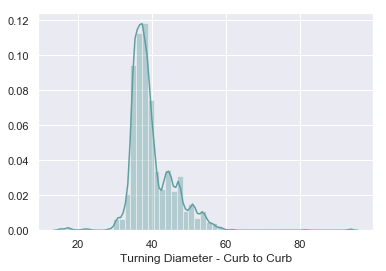

In [14]:
sns.distplot(df['Turning Diameter - Curb to Curb'].dropna(), color='cadetblue')

In [15]:
df.loc[df['Turning Diameter - Curb to Curb'] > 60]['Body Style'].value_counts()

Full-size Cargo Van           22
Crew Cab Pickup - Long Bed    21
Specialty Vehicle             20
Mini-van, Cargo                3
Name: Body Style, dtype: int64

#### `Reverse ratio`

In [16]:
df['Reverse Ratio (:1)'] = df['Reverse Ratio (:1)'].str.split('/').str.get(0).str.strip('-TBD-')
df['Reverse Ratio (:1)'] = df['Reverse Ratio (:1)'].str.split('-').str.get(0).str.strip('Variable')
df['Reverse Ratio (:1)'] = df['Reverse Ratio (:1)'].str.split().str.get(0).astype(float)

C:\Users\Nicolas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


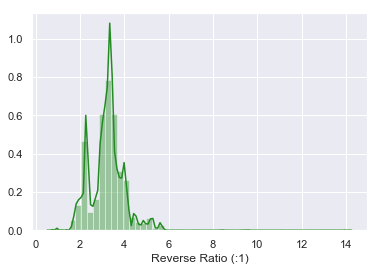

In [17]:
sns.distplot(df['Reverse Ratio (:1)'].dropna(), color='forestgreen')

In [18]:
df['Reverse Ratio (:1)'] = df['Reverse Ratio (:1)'].clip(upper=10, inplace=True)

#### `Number of gears`

In [19]:
df['Transmission'] = df['Transmission'].str.lower()
df['Gears'] = df['Transmission'].str.split("-speed", expand=True, n = 1)[0].str[-2:].str.strip()
df['Gears'] = df['Gears'].str.strip(letters).str.strip('/').str.strip(',').replace(r'^\s*$', np.nan, regex=True)
df['Gears'] = df['Gears'].astype(float)
df['Gears'].value_counts()

6.0     12541
5.0      8336
4.0      5168
8.0      3418
7.0      1579
9.0       554
10.0      190
1.0       106
3.0        21
Name: Gears, dtype: int64

#### `Horsepower`

In [20]:
df['Net Horsepower'] = df['SAE Net Horsepower @ RPM'].str.split("@",expand=True)[0]
df['Net Horsepower'] = df['Net Horsepower'].str.replace('\–|\(|T|\-', '').str.replace('BD', '')
df['Net Horsepower'] = df['Net Horsepower'].replace(" ", 'NA')
df['Net Horsepower'] = df['Net Horsepower'].str[:3]
df['Net Horsepower'] = df['Net Horsepower'].replace(r'^\s*$', np.nan, regex=True)
df['Net Horsepower'] = df['Net Horsepower'].astype(float)

#### `Net Horsepower RPM`

In [21]:
df['Net Horsepower RPM'] = df['SAE Net Horsepower @ RPM'].str.split("@",expand=True)[1].str.split('-').str.get(0)
df['Net Horsepower RPM'] = df['Net Horsepower RPM'].str.replace("- TBD -", "NA").replace("NA", np.nan)
df['Net Horsepower RPM'] = df['Net Horsepower RPM'].str.split('/').str.get(0).str.replace('\(est\)', '').str.strip(symbols)
df['Net Horsepower RPM'] = df['Net Horsepower RPM'].str[:4]
df['Net Horsepower RPM'] = df['Net Horsepower RPM'].replace(r'^\s*$', np.nan, regex=True).astype(float)

#### `Net Torque`

In [22]:
df['Net Torque'] = df['SAE Net Torque @ RPM']
df['Net Torque'] = df['Net Torque'].str.split("@", expand=True)
df['Net Torque'] = df['Net Torque'].str.split(" ", expand=True)[0]
df['Net Torque'] = df['Net Torque'].str.replace('3350', '335').str.strip(symbols).replace(r'^\s*$', np.nan, regex=True)
df['Net Torque'] = df['Net Torque'].astype(float)
# df[df['Net Torque'].apply(lambda x: len(str(x)) >= 5)]['Net Torque']

#### `Net Torque RPM`

In [23]:
df['Net Torque RPM'] = df['SAE Net Torque @ RPM'].str.split().str.get(2)
df['Net Torque RPM'] = df['Net Torque RPM'].str.split('-').str.get(0)
df['Net Torque RPM'] = df['Net Torque RPM'].str.split('/').str.get(0)
df['Net Torque RPM'] = df['Net Torque RPM'].replace(r'^\s*$', np.nan, regex=True)
df['Net Torque RPM'] = df['Net Torque RPM'].astype(float)

#### `Cylinders`

In [24]:
df['Cylinders'] = df['Engine Type'].str.strip(letters).str.strip(symbols).str.strip(letters).str.strip(symbols)
df['Cylinders'] = df['Cylinders'].str.strip().str.split().str.get(-1)
df['Cylinders'] = df['Cylinders'].str.replace("-", "").str.replace("/", "")
df['Cylinders'] = df['Cylinders'].str.lstrip(letters)
df['Cylinders'] = df['Cylinders'].replace(r'^\s*$', np.nan, regex=True).replace('4Cyl', '4')
df['Cylinders'] = df['Cylinders'].astype(float)
df['Cylinders'].value_counts()

4.0     11750
6.0     10970
8.0      9316
5.0       531
12.0      310
3.0       136
10.0       87
Name: Cylinders, dtype: int64

#### `Engine Configuration`

In [25]:
config = ['turbo', 'supercharger', 'regular', 'unleaded', 'premium', 'gas', 'electric', 'turbocharged', 'flexible',
          'intercooled', 'twin', 'unleaded', 'charged', 'ethanol', 'natural', 'high pressure', 'low pressure',
          'ecotec', 'cyl', 'diesel', 'compressed', 'super', 'vortec', '4', '6', '8', '5', '(']
df['Engine Configuration'] = df['Engine Type'].str.lower() 
df['Engine Configuration'] = df['Engine Configuration'].str.strip(numbers).str.lower()
df['Engine Configuration'] = df['Engine Configuration'].str.replace('-', " ").str.replace('/', " ")
df['Engine Configuration'] = df['Engine Configuration'].str.strip(symbols).str.rstrip(numbers)

for i in config:
    df['Engine Configuration'] = df['Engine Configuration'].str.replace(i, " ")
df['Engine Configuration'] = df['Engine Configuration'].str.strip().str[-1]
df['Engine Configuration'] = df['Engine Configuration'].str.upper().str.replace('T', 'FLAT').replace('L', np.nan)
df['Engine Configuration'].value_counts()

V       19155
I       11742
FLAT      966
H         431
W          83
Name: Engine Configuration, dtype: int64

#### `Displacement (L)`

In [26]:
df['Displacement (L)'] = df['Displacement'].str.split("/", expand=True)[0].str[:3]
df['Displacement (L)'] = df['Displacement (L)'].str.replace('39.', '3.9')
df['Displacement (L)'] = df['Displacement (L)'].str.strip(symbols).str.strip(letters).replace(r'^\s*$',
                                                                        np.nan, regex=True).astype(float)
df['Displacement (L)'].value_counts().head()

2.0    4334
3.5    2419
2.5    2410
3.0    2179
3.6    1962
Name: Displacement (L), dtype: int64

#### `Displacement (cc)`

In [27]:
df['Displacement (cc)'] = df['Displacement'].str.split("/", expand=True)[1]
df['Displacement (cc)'] = df['Displacement (cc)'].str.replace('- TBD -', 'NA')
df['Displacement (cc)'] = df['Displacement (cc)'].str.replace('- TBD –', 'NA')
df['Displacement (cc)'] = df['Displacement (cc)'].replace('NA', np.nan).str.strip(letters)
df['Displacement (cc)'] = df['Displacement (cc)'].replace(r'^\s*$', np.nan, regex=True).astype(float)

#### `Rear Tire Width`

In [28]:
df["Rear Tire Width"] = df["Rear Tire Size"].str.split("/").str.get(0).str[-3:].str.strip()
df["Rear Tire Width"] = df["Rear Tire Width"].replace('R20', np.nan).replace('R18', np.nan)
df["Rear Tire Width"] = df["Rear Tire Width"].replace('D -', np.nan).replace('R15', np.nan).replace('R15', np.nan)
df["Rear Tire Width"] = df["Rear Tire Width"].replace('18"', np.nan).replace('60A', np.nan)
df["Rear Tire Width"] = df["Rear Tire Width"].astype(float)
df["Rear Tire Width"].value_counts().head(8)

245.0    5851
235.0    4869
225.0    4265
265.0    3542
215.0    2916
205.0    2715
255.0    2500
275.0    2497
Name: Rear Tire Width, dtype: int64

#### `Front Tire Width`

In [29]:
df["Front Tire Width"] = df["Front Tire Size"].str.split("/").str.get(0).str[-3:].str.strip()
df["Front Tire Width"] = df["Front Tire Width"].replace('R20', 'NA').str.strip(letters).str.strip(symbols)
df["Front Tire Width"] = df["Front Tire Width"].replace('18"', 'NA').replace('R15', '').replace('D -', '')
df["Front Tire Width"] = df["Front Tire Width"].replace("NA", np.nan).replace("60", np.nan).replace("15", np.nan)
df["Front Tire Width"] = df["Front Tire Width"].replace(r'^\s*$', np.nan, regex=True).astype(float)
df["Front Tire Width"].value_counts().head(8)

245.0    6472
235.0    5203
225.0    4634
265.0    3522
215.0    2947
205.0    2795
255.0    2702
275.0    2142
Name: Front Tire Width, dtype: int64

#### `Rear Wheel Size`

In [30]:
df["Rear Wheel Size"] = df["Rear Wheel Size (in)"].str[:2].str.strip('-').str.strip('P2')
df["Rear Wheel Size"] = df["Rear Wheel Size"].replace(r'^\s*$', np.nan, regex=True)
df["Rear Wheel Size"] = df["Rear Wheel Size"].replace('1', np.nan).replace('0', np.nan).astype(float)
df["Rear Wheel Size"].value_counts()

17.0    8952
18.0    7500
16.0    7188
15.0    3268
19.0    2581
14.0     495
13.0      84
Name: Rear Wheel Size, dtype: int64

#### `Front Wheel Size`

In [31]:
df["Front Wheel Size"] = df["Front Wheel Size (in)"].str[:2].str.strip('-').str.strip('P2')
df["Front Wheel Size"] = df["Front Wheel Size"].replace('0', np.nan).replace('1', np.nan)
df["Front Wheel Size"] = df["Front Wheel Size"].replace(r'^\s*$', np.nan, regex=True).astype(float)
df["Front Wheel Size"].value_counts()

17.0    8962
18.0    7614
16.0    7208
15.0    3272
19.0    2606
14.0     495
13.0      84
Name: Front Wheel Size, dtype: int64

#### `Tire Rating`

In [32]:
df["Tire Rating"] = df["Front Tire Size"].str.split("/").str.get(-1).str.strip(numbers).str[0].str.upper()
df["Tire Rating"] = df["Tire Rating"].replace(r'^\s*$', np.nan, regex=True).replace('-', np.nan)
df["Tire Rating"] = df["Tire Rating"].replace('"', np.nan).replace('P', np.nan).replace('X', np.nan)
df["Tire Rating"].value_counts()

R    16516
H     6054
V     3028
S     2754
T     1516
Y     1289
Z     1254
W      903
Name: Tire Rating, dtype: int64

#### `Tire Width Ratio`

In [33]:
df["Tire Width Ratio"] = df["Rear Tire Width"]/df["Front Tire Width"]

#### `Wheel Size Ratio`

In [34]:
df["Wheel Size Ratio"] = df["Rear Wheel Size"] / df["Front Wheel Size"]

#### `Tire Ratio`

In [35]:
df["Tire Ratio"] = df["Front Tire Size"].str.split("/").str.get(1).str[0]
df["Tire Ratio"] = df["Tire Ratio"].replace('Y', 'NA').replace('NA', np.nan).astype(float)

#### `Year`

In [36]:
df["Year"] = df.index.str[:4].astype(float)
df["Year"].value_counts().head()

2018.0    2806
2019.0    2722
2017.0    2624
2016.0    2233
2015.0    2118
Name: Year, dtype: int64

#### `Drivetrain`

In [37]:
df['Drivetrain'] = df['Drivetrain'].str.replace('-', '').str.title()
df['Drivetrain'] = df['Drivetrain'].str.replace('4', 'Four').str.replace('2', 'Four')
df['Drivetrain'] = df['Drivetrain'].str.replace('FourWheel', 'Four Wheel').str.replace('FrontWheel', 'Front Wheel')
df['Drivetrain'] = df['Drivetrain'].str.replace('Allwheel', 'All Wheel').str.replace('Frontwheel', 'Front Wheel')
df['Drivetrain'] = df['Drivetrain'].str.replace('Fourwheel', 'Four Wheel').str.replace('Rearwheel', 'Rear Wheel')
df['Drivetrain'] = df['Drivetrain'].str.replace('Awd', 'All Wheel Drive').str.replace('FourWd', 'Four Wheel Drive')
df['Drivetrain'] = df['Drivetrain'].str.replace('Rwd', 'Rear Wheel Drive')
df['Drivetrain'].value_counts()

Rear Wheel Drive     10035
Front Wheel Drive     9962
Four Wheel Drive      6939
All Wheel Drive       6682
Name: Drivetrain, dtype: int64

#### `Sixth Gear Ratio (:1)`

In [38]:
df['Sixth Gear Ratio (:1)'] = df['Sixth Gear Ratio (:1)'].str.strip(letters).str.strip(symbols)
df['Sixth Gear Ratio (:1)'] = df['Sixth Gear Ratio (:1)'].str.strip(' TBD ').replace(r'^\s*$', np.nan, regex=True).astype(float)

#### `Country of origin`

In [39]:
df['Make'].value_counts().index

Index(['Ford', 'Chevrolet', 'Toyota', 'Nissan', 'GMC', 'Honda', 'Volkswagen',
       'Subaru', 'BMW', 'Audi', 'Ram', 'Hyundai', 'Mercedes-Benz', 'Jeep',
       'Mazda', 'Kia', 'Porsche', 'Cadillac', 'Volvo', 'Dodge', 'Jaguar',
       'Buick', 'Acura', 'Land Rover', 'Lincoln', 'Mitsubishi', 'Lexus',
       'Infiniti', 'Chrysler', 'Fiat', 'Maserati', 'Mini', 'Bentley', 'Tesla',
       'Rolls-Royce', 'Smart', 'Aston Martin', 'Alfa Romeo', 'Lamborghini',
       'Genesis', 'Lotus', 'McLaren', 'Ferrari'],
      dtype='object')

In [40]:
df['Country'] = df['Make']

In [41]:
df['Country'] = df['Country'].replace(['Ford', 'Chevrolet', 'GMC', 'Ram', 'Jeep', 'Cadillac', 'Dodge',
                                      'Buick', 'Lincoln', 'Chrysler', 'Tesla'], 'USA')
df['Country'] = df['Country'].replace(['Jaguar', 'Land Rover', 'Bentley', 'Rolls-Royce', 
                                       'Aston Martin', 'Lotus', 'McLaren', 'Mini'], 'UK')
df['Country'] = df['Country'].replace(['Toyota', 'Nissan', 'Honda', 'Subaru', 'Mazda', 'Acura', 
                                       'Mitsubishi', 'Lexus', 'Infiniti'], 'Japan')
df['Country'] = df['Country'].replace(['Volkswagen', 'BMW', 'Audi', 'Mercedes-Benz', 'Porsche', 'Smart'], 'Germany')
df['Country'] = df['Country'].replace(['Hyundai', 'Kia', 'Genesis'], 'Korea')
df['Country'] = df['Country'].replace(['Volvo'], 'Sweden')
df['Country'] = df['Country'].replace(['Fiat', 'Maserati', 'Alfa Romeo', 'Lamborghini', 'Ferrari'], 'Italy')

In [42]:
df['Country'].value_counts()

USA        14072
Japan      10942
Germany     6164
Korea       1964
UK          1221
Sweden       572
Italy        399
Name: Country, dtype: int64

#### `Country Code`

In [43]:
df['Country Code'] = df['Country'].astype("category").cat.codes

In [44]:
df['Country Code'].value_counts()

6    14072
2    10942
0     6164
3     1964
5     1221
4      572
1      399
Name: Country Code, dtype: int64

#### `Redundant Specs`

In [45]:
specs_to_delete = ['Gas Mileage', 'Engine', 'Engine Type', 'SAE Net Horsepower @ RPM', 'SAE Net Torque @ RPM',
                  'Displacement', 'Trans Description Cont.', 'Rear Tire Size', 'Front Tire Size', 'Rear Wheel Size (in)',
                  'Front Wheel Size (in)', 'Transmission', 'EPA Class', 'Brake ABS System', 'Disc - Front (Yes or   )',
                  'Brake Type', 'Disc - Rear (Yes or   )', 'Spare Tire Size', 'Spare Wheel Size (in)',
                   'Spare Wheel Material', 'Trans Type']
df = df.drop(specs_to_delete, axis=1)

#### Identifying columns with NaN totalling more than `threshold` elements

In [46]:
threshold = 9e3

In [47]:
col_to_delete = df.columns[df.isna().sum() >= threshold].tolist()
col_to_delete.remove('EPA Classification')

In [48]:
col_to_delete[:30]

['Base Curb Weight (lbs)',
 'Second Hip Room (in)',
 'Front Hip Room (in)',
 'Passenger Volume',
 'Track Width, Rear (in)',
 'Min Ground Clearance (in)',
 'Track Width, Front (in)',
 'Cargo Volume to Seat 3',
 'Cargo Volume to Seat 1',
 'Cargo Volume to Seat 2',
 'Fuel Economy Est-Combined (MPG)',
 'Engine Order Code',
 'Trans Description Cont. Again',
 'Fifth Gear Ratio (:1)',
 'Final Drive Axle Ratio (:1)',
 'Sixth Gear Ratio (:1)',
 'Trans Order Code',
 'Reverse Ratio (:1)',
 'Rear Drum Diam x Width (in)',
 'Drum - Rear (Yes or   )',
 'Spare Tire Order Code',
 'Front Tire Order Code',
 'Rear Tire Order Code',
 'Suspension Type - Front (Cont.)',
 'Suspension Type - Rear (Cont.)',
 'Cold Cranking Amps @ 0° F (Primary)',
 'Maximum Alternator Capacity (amps)',
 'Maximum Trailering Capacity (lbs)',
 'Wt Distributing Hitch - Max Trailer Wt. (lbs)',
 'Dead Weight Hitch - Max Trailer Wt. (lbs)']

In [49]:
df = df.drop(col_to_delete, axis=1)

In [50]:
# df.to_csv(r'C:/Users/Nicolas/Documents/Scraping/thecarconnection/df_cleaning_all_may.csv')

### Inspecting remaining columns

In [51]:
df.columns

Index(['MSRP', 'Make', 'Model', 'Style Name', 'Drivetrain',
       'Passenger Capacity', 'Passenger Doors', 'Body Style',
       'EPA Classification', 'Front Shoulder Room (in)',
       'Front Head Room (in)', 'Second Leg Room (in)', 'Front Leg Room (in)',
       'Second Shoulder Room (in)', 'Second Head Room (in)',
       'Height, Overall (in)', 'Wheelbase (in)', 'Width, Max w/o mirrors (in)',
       'Fuel Tank Capacity, Approx (gal)', 'EPA Fuel Economy Est - Hwy (MPG)',
       'EPA Fuel Economy Est - City (MPG)', 'Fuel System',
       'Third Gear Ratio (:1)', 'First Gear Ratio (:1)',
       'Fourth Gear Ratio (:1)', 'Second Gear Ratio (:1)',
       'Front Brake Rotor Diam x Thickness (in)',
       'Rear Brake Rotor Diam x Thickness (in)', 'Steering Type',
       'Turning Diameter - Curb to Curb', 'Rear Wheel Material',
       'Front Wheel Material', 'Suspension Type - Front',
       'Suspension Type - Rear', 'Air Bag-Frontal-Driver',
       'Air Bag-Frontal-Passenger', 'Air Bag-Passe

In [52]:
df.isnull().sum()

MSRP                                          67
Make                                           0
Model                                          0
Style Name                                     0
Drivetrain                                  1716
Passenger Capacity                             0
Passenger Doors                                0
Body Style                                  1716
EPA Classification                         13445
Front Shoulder Room (in)                    3312
Front Head Room (in)                        3258
Second Leg Room (in)                        6777
Front Leg Room (in)                         3265
Second Shoulder Room (in)                   6851
Second Head Room (in)                       6757
Height, Overall (in)                        2177
Wheelbase (in)                              2019
Width, Max w/o mirrors (in)                 2117
Fuel Tank Capacity, Approx (gal)            2217
EPA Fuel Economy Est - Hwy (MPG)            5774
EPA Fuel Economy Est

#### `MSRP`

C:\Users\Nicolas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'MSRP Distribution (clipped at 100,000$)')

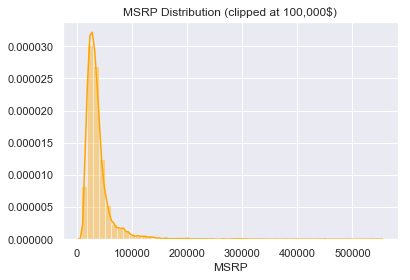

In [53]:
sns.distplot(df['MSRP'].dropna(), color='orange').set_title('MSRP Distribution (clipped at 100,000$)')

Text(0.5,1,'Average MSRP per country of origin')

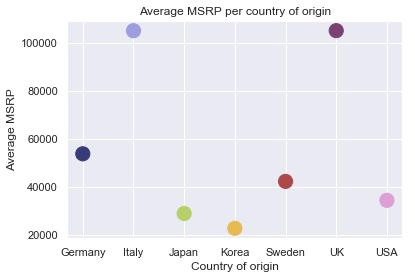

In [54]:
msrp_dist = df.groupby('Country').mean()['MSRP']
plt.scatter(msrp_dist.index, msrp_dist, c=np.arange(1, 8), s=200, marker='o', cmap='tab20b')
plt.xlabel('Country of origin')
plt.ylabel('Average MSRP')
plt.title('Average MSRP per country of origin')

#### `Passenger Capacity`

In [55]:
df['Passenger Capacity'].value_counts()

5     18366
6      4172
4      3304
7      2235
0      1969
2      1937
3      1780
8      1168
12      257
9       140
15        5
1         1
Name: Passenger Capacity, dtype: int64

In [56]:
df['Passenger Capacity'] = df['Passenger Capacity']

That's weird. 0 passengers? Maybe it's the old data

In [57]:
df.loc[df['Passenger Capacity'] == '0']['Year'].value_counts()

1995.0    385
1994.0    298
1992.0    286
1991.0    261
1996.0    253
1993.0    251
1990.0    235
Name: Year, dtype: int64

We will delete all cars dating before 2000

In [58]:
df['Year'] = df['Year'].astype(int)
df = df.loc[df['Year'] >= 2e3]

In [59]:
len(df)

31738

In [60]:
df['Passenger Capacity'] = df['Passenger Capacity'].str.replace('1', '2').astype(float)
df['Passenger Capacity'].value_counts()

5.0     17488
6.0      4000
4.0      3042
7.0      2212
2.0      1876
3.0      1577
8.0      1159
22.0      241
9.0       138
25.0        5
Name: Passenger Capacity, dtype: int64

#### `Passenger Doors`

In [61]:
df['Passenger Doors'].value_counts()

4    22970
2     7992
3      776
Name: Passenger Doors, dtype: int64

In [62]:
df['Passenger Doors'] = df['Passenger Doors'].astype(float)

#### `Body Style`

In [63]:
df['Body Style'].isnull().sum()

0

In [64]:
df['Body Style'] = df['Body Style'].str.replace('Crew Cab Pickup', 'Crew Cab Pickup - Standard Bed')
df['Body Style'] = df['Body Style'].str.replace('Extended Cab Pickup', 'Extended Cab Pickup - Standard Bed')
df['Body Style'] = df['Body Style'].str.replace('Regular Cab Chassis-Cab', 'Regular Cab Pickup - Standard Bed')
df.loc[df['Body Style'] == 'Hatchback', 'Body Style'] = '3dr Car'
df.loc[df['Body Style'] == 'Crew Cab Pickup - Standard Bed', 'Body Style'] = np.nan
df.loc[df['Body Style'] == 'Extended Cab Pickup - Standard Bed'] = np.nan

In [65]:
df['Body Style'].value_counts()

4dr Car                                              9178
Sport Utility                                        8086
2dr Car                                              2513
Crew Cab Pickup - Standard Bed - Short Bed           1672
Convertible                                          1480
Crew Cab Pickup - Standard Bed - Standard Bed        1371
Extended Cab Pickup - Standard Bed - Short Bed        974
Station Wagon                                         915
Extended Cab Pickup - Standard Bed - Standard Bed     866
Extended Cab Pickup - Standard Bed - Long Bed         836
Regular Cab Pickup - Long Bed                         777
Crew Cab Pickup - Standard Bed - Long Bed             746
Mini-van, Passenger                                   491
Regular Cab Pickup - Short Bed                        400
Regular Cab Pickup - Standard Bed                     388
Full-size Passenger Van                               371
Full-size Cargo Van                                   369
Specialty Vehi

Text(0.5,0,'Count')

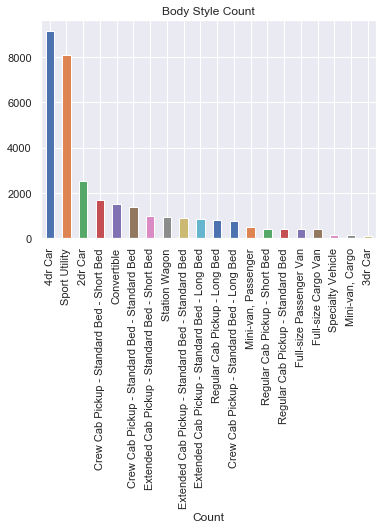

In [66]:
df['Body Style'].value_counts().plot(kind='bar', title='Body Style Count')
plt.xlabel('Count')

#### `Category`

In [67]:
df['Category'] = df['Body Style']

van = ['Mini-van, Cargo', 'Full-size Passenger Van', 'Full-size Cargo Van', 'Mini-van, Passenger', 'Specialty Vehicle']

for item in van:
    df['Category'] = df['Category'].str.replace(item, 'Van')
    
pickups = ['Crew Cab Pickup - Short Bed', 'Crew Cab Pickup - Standard Bed', 
        'Extended Cab Pickup - Short Bed', 'Extended Cab Pickup - Standard Bed',
        'Extended Cab Pickup - Long Bed', 'Regular Cab Pickup - Long Bed', 
        'Crew Cab Pickup - Long Bed', 'Regular Cab Pickup - Short Bed', 
        'Regular Cab Pickup - Standard Bed', 'Extended Cab Pickup', 'Crew Cab Pickup',
        'Regular Cab Chassis-Cab', 'Pickup - Short Bed', 'Pickup - Standard Bed', 'Pickup - Long Bed']

for item in pickups:
    df['Category'] = df['Category'].str.replace(item, 'Pickup')
    
df['Category'] = df['Category'].str.replace('Sport Utility', 'SUV')

car = ['2dr Car', '4dr Car', 'Convertible', 'Station Wagon', '3dr Car', 'Hatchback']

for item in car:
    df['Category'] = df['Category'].str.replace(item, 'Car')

In [68]:
df['Category'].value_counts()

Car       14150
SUV        8086
Pickup     8030
Van        1467
Name: Category, dtype: int64

#### `EPA Classification`

In [69]:
df['EPA Classification'].isnull().sum()

10950

In [70]:
df['EPA Classification'] = df['EPA Classification'].str.replace('Compact Cars', 'Compact')
df['EPA Classification'] = df['EPA Classification'].str.replace('Mid-Size Cars', 'Midsize')
df['EPA Classification'] = df['EPA Classification'].str.replace('Small Sport Utility Vehicles 4WD', 'Small SUV 4WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('4WD Sport Utility Vehicle', 'SUV 4WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('Small Sport Utility Vehicles 2WD', 'Small SUV 2WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('Mid-Size', 'Midsize')
df['EPA Classification'] = df['EPA Classification'].str.replace('Two-Seaters', 'Two-Seater')
df['EPA Classification'] = df['EPA Classification'].str.replace('Sub-Compact', 'Subcompact')
df['EPA Classification'] = df['EPA Classification'].str.replace('Small Station Wgn', 'Small Station Wagon')
df['EPA Classification'] = df['EPA Classification'].str.replace('Large Cars', 'Large')
df['EPA Classification'] = df['EPA Classification'].str.replace('Subcompact Cars', 'Subcompact')
df['EPA Classification'] = df['EPA Classification'].str.replace('4WD Sport Utility', 'SUV 4WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('Standard Sport Utility Vehicles 4WD', 'SUV 4WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('SUV 4WDs', 'SUV 4WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('Sport Utility Vehicle - 4WD', 'SUV 4WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('Sport Utility Vehicle - 2WD', 'SUV 2WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('SUV 4WDs', 'SUV 4WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('Large Car', 'Large')
df['EPA Classification'] = df['EPA Classification'].str.replace('2WD Sport Utility', 'SUV 2WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('Subcompact car', 'Subcompact')
df['EPA Classification'] = df['EPA Classification'].str.replace('2WD Sport Utility Vehicles', 'SUV 2WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('Standard Sport Utility Vehicles 2WD', 'SUV 2WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('Mini-Compact', 'Minicompact Cars')
df['EPA Classification'] = df['EPA Classification'].str.replace('Midsize Car', 'Midsize')
df['EPA Classification'] = df['EPA Classification'].str.replace('AWD Sport Utility', 'SUV 4WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('SUV 2WD Vehicle', 'SUV 2WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('Two-Seater', 'Two Seater')
df['EPA Classification'] = df['EPA Classification'].str.replace('Sport Utility Vehicle', 'SUV')
df['EPA Classification'] = df['EPA Classification'].str.replace('Midsizes', 'Midsize')
df['EPA Classification'] = df['EPA Classification'].str.replace('2WD Minivans', '2WD Minivan')
df['EPA Classification'] = df['EPA Classification'].str.replace('Special Purpose Vehicle', 'Special Purpose')
df['EPA Classification'] = df['EPA Classification'].str.replace('Small Station Wagons', 'Small Station Wagon')
df['EPA Classification'] = df['EPA Classification'].str.replace('SUV 2WDs', 'SUV 2WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('Midsize Sedan', 'Midsize')
df['EPA Classification'] = df['EPA Classification'].str.replace('2WD Sport Utililty', 'SUV 2WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('FWD SUV', 'SUV 2WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('Midsize cars', 'Midsize')
df['EPA Classification'] = df['EPA Classification'].str.replace('SUV - AWD', 'SUV 4WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('Minicompact Car', 'Minicompact')
df['EPA Classification'] = df['EPA Classification'].str.replace('Minicompact Cars ', 'Minicompact')
df['EPA Classification'] = df['EPA Classification'].str.replace('Mid-size', 'Midsize')
df['EPA Classification'] = df['EPA Classification'].str.replace('FWD Sport Utility', 'SUV 2WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('Sub-compact', 'Subcompact')
df['EPA Classification'] = df['EPA Classification'].str.replace('SUVs', 'SUV')
df['EPA Classification'] = df['EPA Classification'].str.replace('2 Seater', 'Two Seater')
df['EPA Classification'] = df['EPA Classification'].str.replace('SUV 4WD Vehicle', 'SUV 4WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('2WD sport Utility Vehicle', 'SUV 2WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('Sport Utility', 'SUV')
df['EPA Classification'] = df['EPA Classification'].str.replace('MidSize Cars', 'Midsize')
df['EPA Classification'] = df['EPA Classification'].str.replace('Small station wagon', 'Small Station Wagon')
df['EPA Classification'] = df['EPA Classification'].str.replace('Minicompacts Car', 'Minicompact')
df['EPA Classification'] = df['EPA Classification'].str.replace('Sub Compact', 'Subcompact')
df['EPA Classification'] = df['EPA Classification'].str.replace('Mini-compact', 'Minicompact')
df['EPA Classification'] = df['EPA Classification'].str.replace('SUV 4WDs', 'SUV 4WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('large', 'Large')
df['EPA Classification'] = df['EPA Classification'].str.replace('Two seaters', 'Two Seater')
df['EPA Classification'] = df['EPA Classification'].str.replace('Midsize sedan', 'Midsize')
df['EPA Classification'] = df['EPA Classification'].str.replace('Subcompacts', 'Subcompact')
df['EPA Classification'] = df['EPA Classification'].str.replace('Compact Car', 'Compact')
df['EPA Classification'] = df['EPA Classification'].str.replace('Midsize Station Wagons', 'Midsize Station Wagon')
df['EPA Classification'] = df['EPA Classification'].str.replace('Two seater', 'Two Seater')
df['EPA Classification'] = df['EPA Classification'].str.replace('4WD sport Utility Vehicle', 'SUV 4WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('Compact Sedan', 'Compact')
df['EPA Classification'] = df['EPA Classification'].str.replace('Large car', 'Large')
df['EPA Classification'] = df['EPA Classification'].str.replace('Subcompact Car', 'Subcompact')
df['EPA Classification'] = df['EPA Classification'].str.replace('Two Seaters', 'Two Seater')
df['EPA Classification'] = df['EPA Classification'].str.replace('Minivan - 2WD', '2WD Minivan')
df['EPA Classification'] = df['EPA Classification'].str.replace('4WD Minivans', '4WD Minivan')
df['EPA Classification'] = df['EPA Classification'].str.replace('2WD Special Purpose', 'Special Purpose 2WD')
df['EPA Classification'] = df['EPA Classification'].str.replace('Midsize S/W', 'Midsize Station Wagon')
df['EPA Classification'] = df['EPA Classification'].str.replace('Midsize Wagon', 'Midsize Station Wagon')
df['EPA Classification'] = df['EPA Classification'].str.replace('2WD Van', '2WD Minivan')
df['EPA Classification'] = df['EPA Classification'].str.replace('Minicompacts', 'Minicompact')
df.loc[df['EPA Classification'] == 'Full Size', 'EPA Classification'] = 'Midsize'
df.loc[df['EPA Classification'] == 'Wagon', 'EPA Classification'] = 'Small Station Wagon'
df.loc[df['EPA Classification'] == 'Small SUV', 'EPA Classification'] = 'SUV'
df.loc[df['EPA Classification'] == 'Pickup Trucks', 'EPA Classification'] = np.nan
df.loc[df['EPA Classification'] == 'Light-Duty Truck', 'EPA Classification'] = np.nan
df.loc[df['EPA Classification'] == '4WD Pickup Trucks', 'EPA Classification'] = np.nan
df.loc[df['EPA Classification'] == '4WD Standard Pickup Truck', 'EPA Classification'] = np.nan

In [71]:
df['EPA Classification'].value_counts()

Compact                  4110
Midsize                  3604
SUV 4WD                  2150
Subcompact               1766
Large                    1628
SUV 2WD                  1285
Small SUV 4WD            1258
Two Seater               1078
Small SUV 2WD             881
Small Station Wagon       836
Minicompact               612
Midsize Station Wagon     479
2WD Minivan               407
SUV                       398
Special Purpose           101
Special Purpose 2WD        85
4WD Minivan                60
4WD Special Purpose        10
Name: EPA Classification, dtype: int64

Text(0,0.5,'Count')

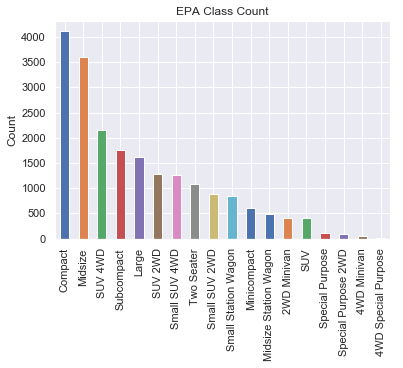

In [72]:
df['EPA Classification'].value_counts().plot(kind='bar')
plt.title('EPA Class Count')
plt.ylabel('Count')

In [73]:
df['EPA Classification'].isnull().sum()

10990

#### `Front shoulder room`

In [74]:
df['Front Shoulder Room (in)'].isnull().sum()

1335

In [75]:
df['Front Shoulder Room (in)'] =df['Front Shoulder Room (in)'].astype(float)

C:\Users\Nicolas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


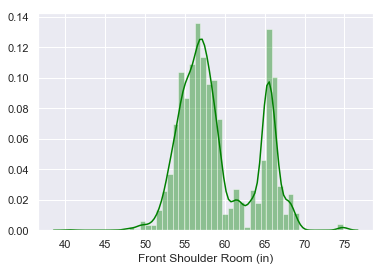

In [76]:
sns.distplot(df['Front Shoulder Room (in)'].dropna(), color='green')

Outlier?

In [77]:
df.loc[df['Front Shoulder Room (in)'] > 62]['Body Style'].value_counts()

Sport Utility                                        1359
Crew Cab Pickup - Standard Bed - Short Bed           1225
Crew Cab Pickup - Standard Bed - Standard Bed        1196
Regular Cab Pickup - Long Bed                         697
Extended Cab Pickup - Standard Bed - Long Bed         692
Extended Cab Pickup - Standard Bed - Short Bed        637
Crew Cab Pickup - Standard Bed - Long Bed             617
Extended Cab Pickup - Standard Bed - Standard Bed     584
Mini-van, Passenger                                   445
Regular Cab Pickup - Standard Bed                     281
Full-size Passenger Van                               278
Full-size Cargo Van                                   267
Regular Cab Pickup - Short Bed                        183
Specialty Vehicle                                     116
Mini-van, Cargo                                        42
Name: Body Style, dtype: int64

Nah it's only pickups and trucks

In [78]:
df['Front Shoulder Room (in)'] = df['Front Shoulder Room (in)'].astype(float)

#### `Front head room`

In [79]:
df['Front Head Room (in)'] = df['Front Head Room (in)'].astype(float)

C:\Users\Nicolas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


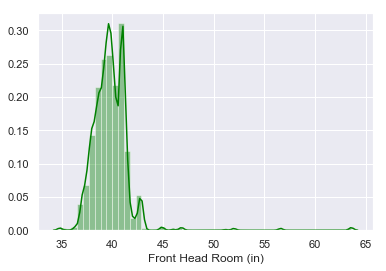

In [80]:
sns.distplot(df['Front Head Room (in)'].dropna(), color='green')

Inspecting apparent outliers

In [81]:
df.loc[df['Front Head Room (in)'] > 45].head()['Body Style'].value_counts()

Mini-van, Passenger        3
Full-size Passenger Van    2
Name: Body Style, dtype: int64

#### `Second leg room`

In [82]:
df['Second Leg Room (in)'].isnull().sum()

4551

In [83]:
df['Second Leg Room (in)'] = df['Second Leg Room (in)'].str.strip('-TBD-').replace(r'^\s*$', 
                                                            np.nan, regex=True).astype(float)

In [84]:
df[df['Second Leg Room (in)'].apply(lambda x: len(str(x)) >= 6)]['Second Leg Room (in)']

Series([], Name: Second Leg Room (in), dtype: float64)

C:\Users\Nicolas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


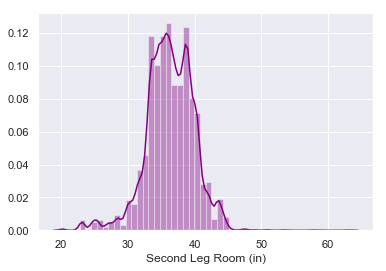

In [85]:
sns.distplot(df['Second Leg Room (in)'].dropna(), color='purple')

#### `Front leg room`

In [86]:
df['Front Leg Room (in)'].isnull().sum()

1298

In [87]:
df['Front Leg Room (in)'] = df['Front Leg Room (in)'].astype(float)

C:\Users\Nicolas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


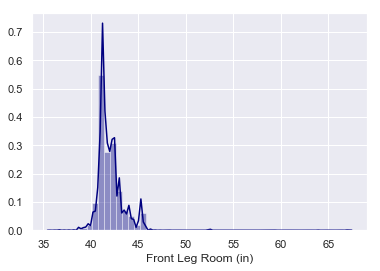

In [88]:
sns.distplot(df['Front Leg Room (in)'].dropna(), color='navy')

In [89]:
df.loc[df['Front Leg Room (in)'] > 50].head()['Front Leg Room (in)']

2011 BMW 5-Series 5-Door 550i Gran Turismo RWD           59.3
2011 BMW 5-Series 5-Door 535i Gran Turismo RWD           59.3
2011 BMW 5-Series 5-Door 550i xDrive Gran Turismo AWD    59.3
2011 BMW 5-Series 5-Door 535i xDrive Gran Turismo AWD    59.3
2019 Kia Sedona EX FWD                                   63.9
Name: Front Leg Room (in), dtype: float64

In [90]:
df['Front Leg Room (in)'] = df['Front Leg Room (in)'].clip(upper=45)

#### `Second shoulder room`

In [91]:
df['Second Shoulder Room (in)'] = df['Second Shoulder Room (in)'].str.replace('-TBD-', '').replace(r'^\s*$', 
                                                            np.nan, regex=True).astype(float)

C:\Users\Nicolas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


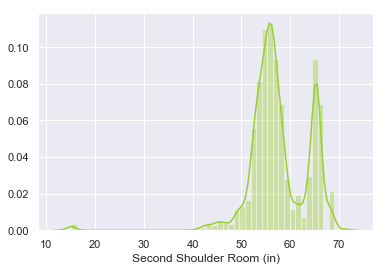

In [92]:
sns.distplot(df['Second Shoulder Room (in)'].dropna(), color='yellowgreen')

In [93]:
df.loc[df['Second Shoulder Room (in)'] < 40].head()['Second Shoulder Room (in)']

2011 Ford Ranger 2WD 2-Door SuperCab 126" Sport    14.1
2011 Ford Ranger 4WD 4-Door SuperCab 126" XLT      14.1
2011 Ford Ranger 4WD 4-Door SuperCab 126" Sport    14.1
2011 Ford Ranger 2WD 4-Door SuperCab 126" XLT      14.1
2011 Ford Ranger 2WD 4-Door SuperCab 126" Sport    14.1
Name: Second Shoulder Room (in), dtype: float64

In [94]:
df['Second Shoulder Room (in)'].clip(lower=40, inplace=True)

#### `Second head room`

In [95]:
df['Second Head Room (in)'] = df['Second Head Room (in)'].str.replace('-TBD-', '').replace(r'^\s*$', 
                                                            np.nan, regex=True).astype(float)

C:\Users\Nicolas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


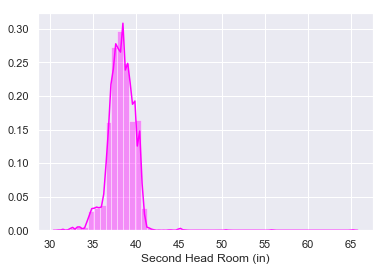

In [96]:
sns.distplot(df['Second Head Room (in)'].dropna(), color='magenta')

In [97]:
df['Second Head Room (in)'].clip(upper=43, inplace=True)

#### `Height`

In [98]:
df['Height, Overall (in)'] = df['Height, Overall (in)'].str.split().str.get(0).astype(float)

C:\Users\Nicolas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


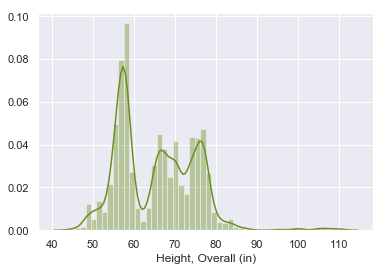

In [99]:
sns.distplot(df['Height, Overall (in)'].dropna(), color='olivedrab')

In [100]:
df.loc[df['Height, Overall (in)'] > 90]['Body Style'].value_counts()

Full-size Cargo Van                  221
Full-size Passenger Van               39
Mini-van, Cargo                       18
Specialty Vehicle                     12
Regular Cab Pickup - Standard Bed      8
Name: Body Style, dtype: int64

In [101]:
df.loc[df['Height, Overall (in)'] < 45]['MSRP'].mean()

432291.81481481483

Text(0.5,1,'MSRP vs. Height')

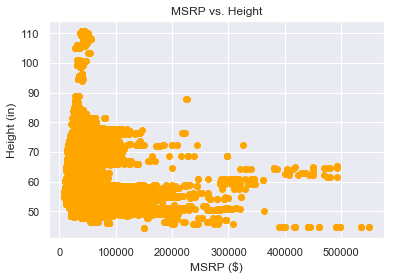

In [102]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(df['MSRP'], df['Height, Overall (in)'] , c='orange', alpha=1)
plt.xlabel('MSRP ($)')
plt.ylabel('Height (in)')
plt.title('MSRP vs. Height')

#### `Wheelbase`

In [103]:
df['Wheelbase (in)'] = df['Wheelbase (in)'].astype(float)

C:\Users\Nicolas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


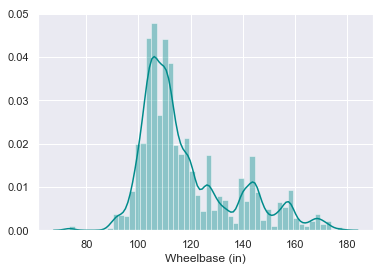

In [104]:
sns.distplot(df['Wheelbase (in)'].dropna(), color='darkcyan')

In [105]:
df.loc[df['Wheelbase (in)'] < 80]['Make'].value_counts()

Smart    63
Name: Make, dtype: int64

#### `Width`

In [106]:
df['Width, Max w/o mirrors (in)'] = df['Width, Max w/o mirrors (in)'].astype(float)

C:\Users\Nicolas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


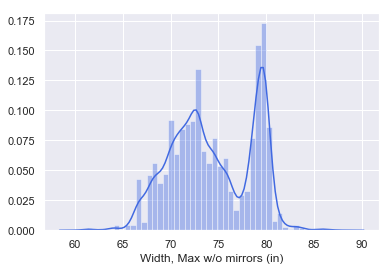

In [107]:
sns.distplot(df['Width, Max w/o mirrors (in)'].dropna(), color='royalblue')

In [108]:
df.loc[df['Width, Max w/o mirrors (in)'] > 84]['Model'].value_counts()

Grand Cherokee    20
F-150             13
Taurus            12
Ranger            12
Edge               6
Grand Caravan      2
NSX                2
Cullinan           1
Name: Model, dtype: int64

In [109]:
df['Width, Max w/o mirrors (in)'].clip(upper=83, inplace=True)

#### `Fuel tank capacity`

In [110]:
df['Fuel Tank Capacity, Approx (gal)'] = df['Fuel Tank Capacity, Approx (gal)'].str.replace('GGE', '').astype(float)

C:\Users\Nicolas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


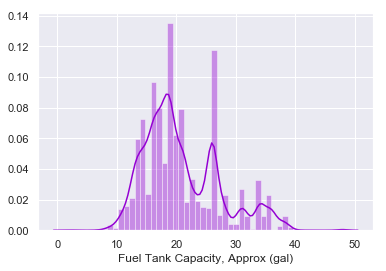

In [111]:
sns.distplot(df['Fuel Tank Capacity, Approx (gal)'].dropna(), color='darkviolet')

In [112]:
df.loc[df['Fuel Tank Capacity, Approx (gal)'] > 40]['Body Style'].value_counts()

Crew Cab Pickup - Standard Bed - Long Bed    29
Sport Utility                                 2
Name: Body Style, dtype: int64

In [113]:
np.argmin(df['Fuel Tank Capacity, Approx (gal)'])

C:\Users\Nicolas\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


'2016 BMW i3 4-Door HB w/Range Extender'

#### `Fuel economy highway`

In [114]:
df['EPA Fuel Economy Est - Hwy (MPG)'] = df['EPA Fuel Economy Est - Hwy (MPG)'].str.split().str.get(0).astype(float)

C:\Users\Nicolas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


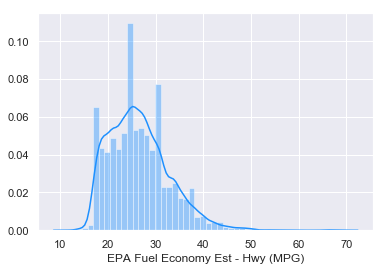

In [115]:
sns.distplot(df['EPA Fuel Economy Est - Hwy (MPG)'].dropna(), color='dodgerblue')

In [116]:
temp_df = df.loc[:, ['MSRP', 'Country']]
temp_df['MSRP'].clip(upper=2e5, inplace=True)

C:\Users\Nicolas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Nicolas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Nicolas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


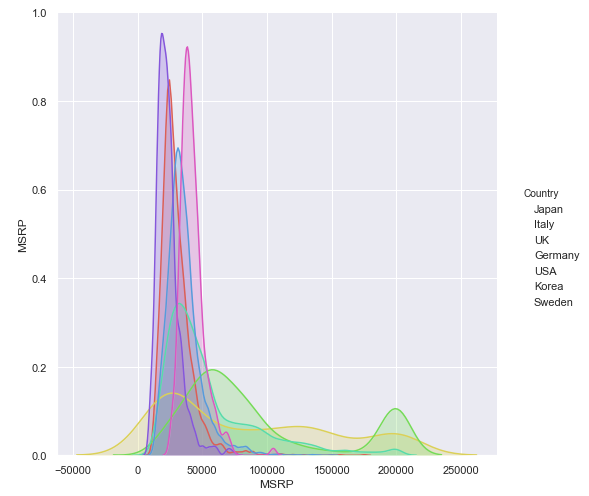

In [117]:
sns.pairplot(temp_df, diag_kind='kde', palette=sns.color_palette("hls", 7), hue='Country', height=7)

#### `Fuel economy city`

In [118]:
df['EPA Fuel Economy Est - City (MPG)'] = df['EPA Fuel Economy Est - City (MPG)'].str.split().str.get(0).astype(float)

C:\Users\Nicolas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


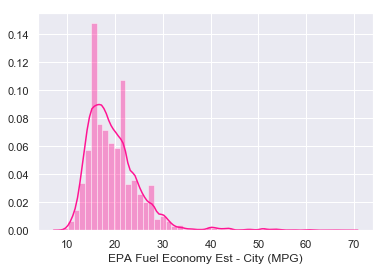

In [119]:
sns.distplot(df['EPA Fuel Economy Est - City (MPG)'].dropna(), color='deeppink')

In [120]:
df.loc[df['EPA Fuel Economy Est - City (MPG)'] > 45]['Hybrid Engine'].value_counts()

1.0    185
0.0      1
Name: Hybrid Engine, dtype: int64

#### `Fuel system`

In [121]:
df['Fuel System'].value_counts().head(10)

Gasoline Direct Injection    5547
Sequential MPI               5085
Electronic Fuel Injection    3701
Direct Injection             2655
SFI                          2610
SMPI                         2345
MPFI                         2012
EFI                          1810
SEFI                         1075
MPI                           824
Name: Fuel System, dtype: int64

In [122]:
df['Fuel System'] = df['Fuel System'].str.replace('Electronic Fuel Injection', 'EFI')
df['Fuel System'] = df['Fuel System'].str.replace('Sequential MPI', 'SMPI')
df['Fuel System'] = df['Fuel System'].str.replace('Electronic fuel injection', 'EFI')
df['Fuel System'] = df['Fuel System'].str.replace('SEFI', 'SEFI')
df['Fuel System'] = df['Fuel System'].str.replace('MFI', 'MPI')
df['Fuel System'] = df['Fuel System'].str.replace('MPFI', 'MPI')
df['Fuel System'] = df['Fuel System'].str.replace('Electronic Fuel Injectino', 'EFI')

#### `Third gear ratio`

In [123]:
df['Third Gear Ratio (:1)'] = df['Third Gear Ratio (:1)'].str.replace('-TBD-', '').replace(r'^\s*$', 
                                                            np.nan, regex=True).astype(float)

In [124]:
df['Third Gear Ratio (:1)'] = df['Third Gear Ratio (:1)'].astype(float)

In [125]:
df.loc[df['Third Gear Ratio (:1)'].isnull()]['Model'].value_counts().head(15)

Murano          119
Altima          104
Rogue            98
Legacy           89
Outback          84
Prius            84
Pathfinder       76
Accord Sedan     74
Sentra           72
A4               62
Titan            60
Maxima           58
Model S          53
Civic Hybrid     52
CR-V             50
Name: Model, dtype: int64

#### `First gear ratio`

In [126]:
df['First Gear Ratio (:1)'] = df['First Gear Ratio (:1)'].str.split().str.get(0)
df['First Gear Ratio (:1)'] = df['First Gear Ratio (:1)'].str.split('-').str.get(0)
df['First Gear Ratio (:1)'] = df['First Gear Ratio (:1)'].str.strip('TBD') # not sure here
df['First Gear Ratio (:1)'] = df['First Gear Ratio (:1)'].str.replace('-TBD-', '').replace(r'^\s*$', 
                                                            np.nan, regex=True).astype(float)

In [127]:
df['First Gear Ratio (:1)'].isnull().sum()

1872

C:\Users\Nicolas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


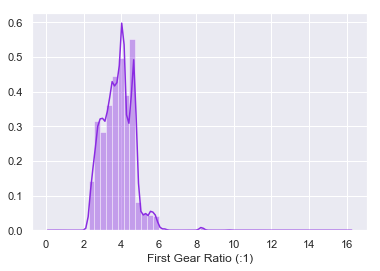

In [128]:
sns.distplot(df['First Gear Ratio (:1)'].dropna(), color='blueviolet')

#### `Fourth gear ratio`

In [129]:
df['Fourth Gear Ratio (:1)'] = df['Fourth Gear Ratio (:1)'].str.split('-').str.get(0).str.split('/').str.get(0)
df['Fourth Gear Ratio (:1)'] = df['Fourth Gear Ratio (:1)'].str.split().str.get(0).astype(float)

C:\Users\Nicolas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


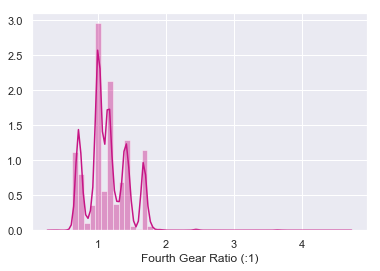

In [130]:
sns.distplot(df['Fourth Gear Ratio (:1)'].dropna(), color='mediumvioletred')

In [131]:
df['Fourth Gear Ratio (:1)'].clip(upper=2.5, inplace=True)

#### `Second gear ratio`

In [132]:
df['Second Gear Ratio (:1)'].isnull().sum()

3296

In [133]:
df['Second Gear Ratio (:1)'] = df['Second Gear Ratio (:1)'].str.split('-').str.get(0)
df['Second Gear Ratio (:1)'] = df['Second Gear Ratio (:1)'].str.split().str.get(0).astype(float)

C:\Users\Nicolas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


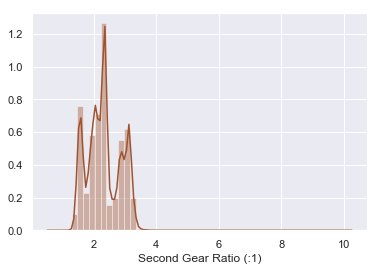

In [134]:
sns.distplot(df['Second Gear Ratio (:1)'].dropna(), color='sienna')

In [135]:
df.loc[df['Second Gear Ratio (:1)'] > 4]['Second Gear Ratio (:1)']

2019 Mercedes-Benz A Class A 220 4MATIC Sedan    10.04
2019 Mercedes-Benz A Class A 220 Sedan           10.04
2005 MINI Cooper 2-Door Coupe                     8.33
2005 MINI Cooper 2-Door Coupe S                   7.79
2002 MINI Cooper 2-Door Coupe S                   7.18
Name: Second Gear Ratio (:1), dtype: float64

#### `Steering Type`

In [136]:
df['Steering Type'].isnull().sum()

58

In [137]:
df['Steering Type'] = df['Steering Type'].str.title().str.replace('Pwr', 'Power').str.replace('Rack & Pinion', 'Rack-Pinion')
df['Steering Type'] = df['Steering Type'].str.replace('Speed Sensitive Power', 'Power Speed Sensitive')
df['Steering Type'] = df['Steering Type'].str.replace('Speed-Sensitive Power', 'Power Speed Sensitive')
df['Steering Type'] = df['Steering Type'].str.replace('Power Rack-Pinion Steering', 'Power Rack-Pinion')
df['Steering Type'] = df['Steering Type'].str.strip('- Tbd -').replace(r'^\s*$', np.nan, regex=True)
df['Steering Type'] = df['Steering Type'].str.replace('Power Rack-&-Pinion', 'Power Rack-Pinion')
df['Steering Type'] = df['Steering Type'].str.replace('Power Rack-And-Pinion', 'Power Rack-Pinion')
df['Steering Type'] = df['Steering Type'].str.replace('Electric-Assist Rack-Pinion', 'Electric Rack-Pinion')
df['Steering Type'] = df['Steering Type'].str.replace('Rack-Pinion Steering', 'Rack-Pinion')
df['Steering Type'] = df['Steering Type'].str.replace('Electric Rack-&-Pinion', 'Electric Rack-Pinion')
df['Steering Type'] = df['Steering Type'].str.replace('Vehicle-Speed-Sensitive', 'Speed-Sensitive')
df['Steering Type'] = df['Steering Type'].str.replace('Vehicle Speed-Sensitive', 'Speed-Sensitive')
df['Steering Type'] = df['Steering Type'].str.replace('Electric Power Steering', 'Electric Power')
df['Steering Type'] = df['Steering Type'].str.replace('Power, Speed-Sensitive', 'Power Speed Sensitive')
df['Steering Type'] = df['Steering Type'].str.replace('Power Speed-Sensitive', 'Power Speed Sensitive')
df['Steering Type'] = df['Steering Type'].str.replace('Hyrdaulic', 'Hydraulic')
df['Steering Type'] = df['Steering Type'].str.replace('Vehicle-Power Speed Sensitive Rack-Pinion', 
                                                      'Power Speed Sensitive Rack-Pinion')
df['Steering Type'] = df['Steering Type'].str.replace('Power Rack And Pinion', 'Power Rack-Pinion')
df['Steering Type'] = df['Steering Type'].str.replace('Variable Power', 'Variable-Assist Power')
df['Steering Type'] = df['Steering Type'].str.replace('Var Power Rack-Pinion', 'Variable Power Rack-Pinion')
df['Steering Type'] = df['Steering Type'].str.replace('-', ' ')
df['Steering Type'] = df['Steering Type'].str.replace('Re Circulating Ball', 'Recirculating Ball')
df['Steering Type'] = df['Steering Type'].str.replace('Recir ', 'Recirculating ') 
df['Steering Type'] = df['Steering Type'].str.replace('Electric Power Assisted Rack Pinion', 'Electric Power Rack Pinion')
df['Steering Type'] = df['Steering Type'].str.replace('Power Assiste', 'Power')
df['Steering Type'].value_counts()

Rack Pinion                                      11457
Power Rack Pinion                                11449
Power                                             4626
Electric Rack Pinion                               937
Recirculating Ball                                 747
Power Recirculating Ball                           653
Variable Assist Power                              239
Variable Assist Power Rack Pinion                  217
Electric Power                                     174
Power Speed Sensitive                              153
Electric Power Rack Pinion                         144
Variable Assist Power Assist                        89
Servotronic Speed Sensitive                         77
Power Speed Sensitive Rack Pinion                   77
Speed Sensitive                                     76
Electric Variable Power Rack Pinion                 76
Servotronic                                         55
Hydraulic Recirculating Ball                        42
Speed Sens

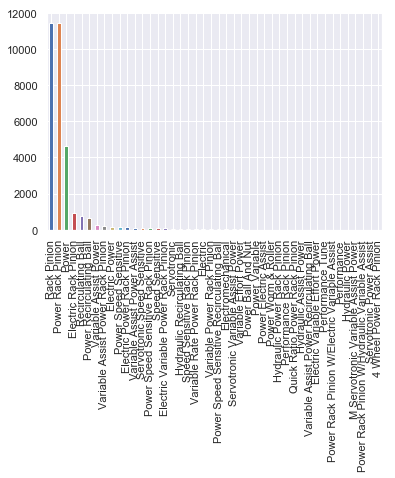

In [138]:
df['Steering Type'].value_counts().plot(kind='bar')

#### `Rear wheel material`

In [139]:
df['Rear Wheel Material'] = df['Rear Wheel Material'].str.strip('- TBD -').replace(r'^\s*$', np.nan, regex=True)
df['Rear Wheel Material'].value_counts()

Aluminum           21190
Steel               6415
Alloy               2659
Styled Steel         636
Forged Aluminum      561
Chrome               256
Carbon Fibre           4
Name: Rear Wheel Material, dtype: int64

#### `Front wheel material`

In [140]:
df['Front Wheel Material'] = df['Front Wheel Material'].str.strip('- TBD -').replace(r'^\s*$', np.nan, regex=True)
df['Front Wheel Material'].value_counts()

Aluminum           21190
Steel               6415
Alloy               2659
Styled Steel         636
Forged Aluminum      561
Chrome               256
Carbon Fibre           4
Name: Front Wheel Material, dtype: int64

#### `Front suspension type`

In [141]:
df['Suspension Type - Front'].isnull().sum()

175

In [142]:
df['Suspension Type - Front'] = df['Suspension Type - Front'].str.title().str.replace('- TBD -', '').replace(r'^\s*$', 
                                                                                                       np.nan, regex=True)
df['Suspension Type - Front'] = df['Suspension Type - Front'].str.replace('Macpherson Strut', 'Macpherson')
df['Suspension Type - Front'] = df['Suspension Type - Front'].str.replace('Coil Spring', 'Coil')
df['Suspension Type - Front'] = df['Suspension Type - Front'].str.replace('-', ' ')
df['Suspension Type - Front'] = df['Suspension Type - Front'].str.replace('4', 'Four')
df['Suspension Type - Front'] = df['Suspension Type - Front'].str.replace('5', 'Five')
df['Suspension Type - Front'] = df['Suspension Type - Front'].str.replace('Macpherson Type', 'Macpherson')
df['Suspension Type - Front'] = df['Suspension Type - Front'].str.replace('Short/Long Arm', 'Short And Long Arm')
df['Suspension Type - Front'] = df['Suspension Type - Front'].str.replace('Strut Type', 'Strut')
df['Suspension Type - Front'] = df['Suspension Type - Front'].str.replace('Four Wheel Independent', 'Independent')
df['Suspension Type - Front'] = df['Suspension Type - Front'].str.replace('Double Whishbone', 'Double Wishbone')
df['Suspension Type - Front'] = df['Suspension Type - Front'].str.replace('Four Link', 'Multi Link')
df['Suspension Type - Front'] = df['Suspension Type - Front'].str.replace('Short Long Arm', 'Short And Long Arm')
df['Suspension Type - Front'] = df['Suspension Type - Front'].str.replace('Independent Four Link', 'Short And Long Arm')
df['Suspension Type - Front'] = df['Suspension Type - Front'].str.replace('Five Link', 'Multi Link')
df['Suspension Type - Front'] = df['Suspension Type - Front'].str.replace('Independent 3 Link', 'Multi Link')
df['Suspension Type - Front'] = df['Suspension Type - Front'].str.replace('Independent Multi Link', 'Multi Link')
df['Suspension Type - Front'] = df['Suspension Type - Front'].str.replace('Independent Multi Link', 'Multi Link')
df['Suspension Type - Front'] = df['Suspension Type - Front'].str.replace('W/', '').str.replace(',', '').str.strip()
df['Suspension Type - Front'] = df['Suspension Type - Front'].str.replace('Indep ', 'Independent ')
df['Suspension Type - Front'] = df['Suspension Type - Front'].str.replace('Ind ', 'Independent ')
df['Suspension Type - Front'] = df['Suspension Type - Front'].str.replace('Macphersons', 'Macpherson')
df['Suspension Type - Front'] = df['Suspension Type - Front'].str.replace('Torsion Bars', 'Torsion Bar')

In [143]:
df.drop(['Suspension Type - Rear', 'Front Wheel Material'], axis=1, inplace=True)

#### `Front brake rotor diameter`

In [144]:
df['Front Brake Rotor Diam x Thickness (in)'].isnull().sum()

2384

In [145]:
df['Front Brake Rotor Diam x Thickness (in)'] = df['Front Brake Rotor Diam x Thickness (in)'].str.split().str.get(0)
df['Front Brake Rotor Diam x Thickness (in)'] = df['Front Brake Rotor Diam x Thickness (in)'].str.strip('"').astype(float)

C:\Users\Nicolas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


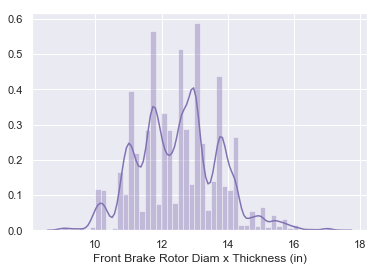

In [146]:
sns.distplot(df['Front Brake Rotor Diam x Thickness (in)'].dropna(), color='m')

#### Rear brake rotor diameter

In [147]:
df['Rear Brake Rotor Diam x Thickness (in)'].isnull().sum()

5308

In [148]:
df['Rear Brake Rotor Diam x Thickness (in)'] = df['Rear Brake Rotor Diam x Thickness (in)'].str.split().str.get(0)
df['Rear Brake Rotor Diam x Thickness (in)'] = df['Rear Brake Rotor Diam x Thickness (in)'].str.strip('"')
df['Rear Brake Rotor Diam x Thickness (in)'] = df['Rear Brake Rotor Diam x Thickness (in)'].str.strip('-TBD')
df['Rear Brake Rotor Diam x Thickness (in)'] = df['Rear Brake Rotor Diam x Thickness (in)'].replace(r'^\s*$', 
                                                                            np.nan, regex=True).astype(float)

### Yes/no features

In [149]:
specs_binary = ['Air Bag-Frontal-Driver', 'Air Bag-Frontal-Passenger', 'Air Bag-Passenger Switch (On/Off)',
       'Air Bag-Side Body-Front', 'Air Bag-Side Body-Rear', 'Air Bag-Side Head-Front', 
       'Air Bag-Side Head-Rear', 'Brakes-ABS', 'Child Safety Rear Door Locks', 'Daytime Running Lights',
       'Traction Control', 'Night Vision', 'Rollover Protection Bars', 'Fog Lamps', 
       'Parking Aid', 'Tire Pressure Monitor', 'Back-Up Camera', 'Stability Control']

In [150]:
'''for spec in specs_binary:
    df[spec] = df[spec].replace('Yes', '1').replace('No', '0')
    df[spec] = df[spec].astype(float)'''

"for spec in specs_binary:\n    df[spec] = df[spec].replace('Yes', '1').replace('No', '0')\n    df[spec] = df[spec].astype(float)"

### Warranty 

In [151]:
specs_warranty = ['Basic Miles/km', 'Basic Years', 'Corrosion Miles/km', 'Corrosion Years', 'Drivetrain Miles/km',
                  'Drivetrain Years', 'Roadside Assistance Miles/km', 'Roadside Assistance Years']

In [152]:
df['Basic Miles/km'].value_counts()

36000.0     20484
50000.0      7731
60000.0      2585
150000.0      332
100000.0      295
72000.0       162
24000.0       145
Name: Basic Miles/km, dtype: int64

In [153]:
df['Basic Years'].value_counts()

3    20789
4     7985
5     2638
6      167
2      155
Name: Basic Years, dtype: int64

In [154]:
df['Corrosion Miles/km'] = df['Corrosion Miles/km'].str.replace(',', '').str.replace('Unlimited', '150000')
df['Corrosion Miles/km'].value_counts()

150000    22233
100000     7785
50000      1233
60000         6
Name: Corrosion Miles/km, dtype: int64

In [155]:
df['Corrosion Years'].value_counts()

5     16162
6      7181
12     4767
7      1480
4      1097
3       258
10      239
8        63
2        10
Name: Corrosion Years, dtype: int64

In [156]:
df['Drivetrain Miles/km'].value_counts()

60000.0     14060
100000.0     6583
50000.0      5521
36000.0      2912
70000.0      1862
150000.0      476
72000.0       162
24000.0        15
120000.0        7
125000.0        1
Name: Drivetrain Miles/km, dtype: int64

In [157]:
df['Drivetrain Years'] = df['Drivetrain Years'].str.replace('Unlimited', '12')
df['Drivetrain Years'].value_counts()

5     18479
4      5529
3      3198
10     2138
6      1939
7       105
12      100
8        81
2        30
Name: Drivetrain Years, dtype: int64

In [158]:
df['Roadside Assistance Miles/km'].value_counts()

100000.0    10402
36000.0      7506
60000.0      5783
50000.0      2681
70000.0       767
25000.0       401
24000.0         3
Name: Roadside Assistance Miles/km, dtype: int64

In [159]:
df['Roadside Assistance Years'] = df['Roadside Assistance Years'].str.replace('Unlimited', '8')
df['Roadside Assistance Years'].value_counts()

5    10701
3     7737
4     6285
2     1425
6      767
8      631
Name: Roadside Assistance Years, dtype: int64

In [160]:
for spec in specs_warranty:
    df[spec] = df[spec].astype(float)

### One-hot encoding

# AFTER IMPUTATION!

In [161]:
df.columns

Index(['MSRP', 'Make', 'Model', 'Style Name', 'Drivetrain',
       'Passenger Capacity', 'Passenger Doors', 'Body Style',
       'EPA Classification', 'Front Shoulder Room (in)',
       'Front Head Room (in)', 'Second Leg Room (in)', 'Front Leg Room (in)',
       'Second Shoulder Room (in)', 'Second Head Room (in)',
       'Height, Overall (in)', 'Wheelbase (in)', 'Width, Max w/o mirrors (in)',
       'Fuel Tank Capacity, Approx (gal)', 'EPA Fuel Economy Est - Hwy (MPG)',
       'EPA Fuel Economy Est - City (MPG)', 'Fuel System',
       'Third Gear Ratio (:1)', 'First Gear Ratio (:1)',
       'Fourth Gear Ratio (:1)', 'Second Gear Ratio (:1)',
       'Front Brake Rotor Diam x Thickness (in)',
       'Rear Brake Rotor Diam x Thickness (in)', 'Steering Type',
       'Turning Diameter - Curb to Curb', 'Rear Wheel Material',
       'Suspension Type - Front', 'Air Bag-Frontal-Driver',
       'Air Bag-Frontal-Passenger', 'Air Bag-Passenger Switch (On/Off)',
       'Air Bag-Side Body-Front', 

In [162]:
df = df.drop('Hybrid', axis=1)

In [163]:
'''specs_to_dummies = ['Drivetrain', 'Body Style', 'EPA Classification', 'Fuel System', 'Steering Type',  'Rear Wheel Material',  
                    'Suspension Type - Front', 'Air Bag-Frontal-Driver', 'Air Bag-Frontal-Passenger', 
                    'Air Bag-Passenger Switch (On/Off)', 'Air Bag-Side Body-Front', 'Air Bag-Side Body-Rear',
                    'Air Bag-Side Head-Front', 'Air Bag-Side Head-Rear', 'Brakes-ABS', 
                    'Child Safety Rear Door Locks', 'Daytime Running Lights', 'Traction Control', 
                    'Night Vision', 'Rollover Protection Bars', 'Fog Lamps', 'Parking Aid', 
                    'Tire Pressure Monitor', 'Back-Up Camera', 'Stability Control', 'Hybrid Engine', 
                    'Engine Configuration', 'Tire Rating', 'Country', 'Category']'''

"specs_to_dummies = ['Drivetrain', 'Body Style', 'EPA Classification', 'Fuel System', 'Steering Type',  'Rear Wheel Material',  \n                    'Suspension Type - Front', 'Air Bag-Frontal-Driver', 'Air Bag-Frontal-Passenger', \n                    'Air Bag-Passenger Switch (On/Off)', 'Air Bag-Side Body-Front', 'Air Bag-Side Body-Rear',\n                    'Air Bag-Side Head-Front', 'Air Bag-Side Head-Rear', 'Brakes-ABS', \n                    'Child Safety Rear Door Locks', 'Daytime Running Lights', 'Traction Control', \n                    'Night Vision', 'Rollover Protection Bars', 'Fog Lamps', 'Parking Aid', \n                    'Tire Pressure Monitor', 'Back-Up Camera', 'Stability Control', 'Hybrid Engine', \n                    'Engine Configuration', 'Tire Rating', 'Country', 'Category']"

In [164]:
'''for item in specs_to_dummies:
    dummies = pd.get_dummies(df[item], prefix_sep=': ', prefix=item)
    df = pd.concat([df, dummies], sort=False, axis=1)

#df = df.drop(specs_to_dummies, axis=1)
df = df.drop('Other Features', axis=1)'''

"for item in specs_to_dummies:\n    dummies = pd.get_dummies(df[item], prefix_sep=': ', prefix=item)\n    df = pd.concat([df, dummies], sort=False, axis=1)\n\n#df = df.drop(specs_to_dummies, axis=1)\ndf = df.drop('Other Features', axis=1)"

In [165]:
df.shape

(31738, 81)

In [166]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 31738 entries, 2017 Acura RDX FWD w/Technology/AcuraWatch Plus Pkg to 2015 Volvo V60 Cross Country 2015.5 4-Door Wagon T5 Platinum AWD
Data columns (total 81 columns):
MSRP                                       31668 non-null float64
Make                                       31735 non-null object
Model                                      31735 non-null object
Style Name                                 31735 non-null object
Drivetrain                                 31735 non-null object
Passenger Capacity                         31735 non-null float64
Passenger Doors                            31735 non-null float64
Body Style                                 31733 non-null object
EPA Classification                         20748 non-null object
Front Shoulder Room (in)                   30403 non-null float64
Front Head Room (in)                       30447 non-null float64
Second Leg Room (in)                       27187 non-null float64
F

In [168]:
df.to_csv(r'C:/Users/Nicolas/Documents/Scraping/thecarconnection/raw_data_cleaning_all_may.csv')

In [ ]:
# df.loc[df.isnull().sum(axis=1).sort_values(ascending=False)[:60].index[:30]].isnull().sum(axis=1)

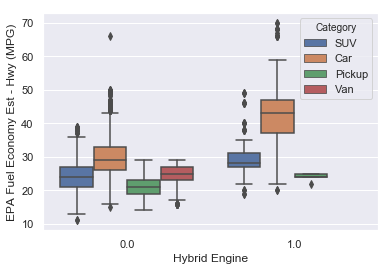

In [172]:
sns.boxplot(df['Hybrid Engine'], df['EPA Fuel Economy Est - Hwy (MPG)'], hue=df['Category'])

In [169]:
df['Body Style'].value_counts()

4dr Car                                              9178
Sport Utility                                        8086
2dr Car                                              2513
Crew Cab Pickup - Standard Bed - Short Bed           1672
Convertible                                          1480
Crew Cab Pickup - Standard Bed - Standard Bed        1371
Extended Cab Pickup - Standard Bed - Short Bed        974
Station Wagon                                         915
Extended Cab Pickup - Standard Bed - Standard Bed     866
Extended Cab Pickup - Standard Bed - Long Bed         836
Regular Cab Pickup - Long Bed                         777
Crew Cab Pickup - Standard Bed - Long Bed             746
Mini-van, Passenger                                   491
Regular Cab Pickup - Short Bed                        400
Regular Cab Pickup - Standard Bed                     388
Full-size Passenger Van                               371
Full-size Cargo Van                                   369
Specialty Vehi

In [174]:
df.loc[df['Make'] == 'Ram']['Year'].value_counts()

2015.0    150
2017.0    146
2018.0    145
2016.0    145
2014.0    140
2019.0    122
2012.0    116
2013.0    115
2011.0     99
Name: Year, dtype: int64

In [1]:
df.head()

NameError: name 'df' is not defined